In [1]:
import numpy as np
import pandas as pd
import xlrd #读取excel的库
Y=[] #先声明一个空list
data=pd.read_csv(r"C:\Users\93631\Desktop\2020Himcm\mat\Y2.csv",header=None)
 #必须添加header=None，否则默认把第一行数据处理成列名导致缺失
Y=data.values.tolist()
Y=np.array(Y)
Y=np.delete(Y,0,axis=0)
data=pd.read_csv(r"C:\Users\93631\Desktop\2020Himcm\mat\R2.csv",header=None)
 #必须添加header=None，否则默认把第一行数据处理成列名导致缺失
R=data.values.tolist()
R=np.array(R)
R=np.delete(R,0,axis=0)
#先导入输入过评价的表格Y，R
#特征个数15
n_features = 15
def serialize(X, theta):
    return np.concatenate((X.ravel(), theta.ravel()))

def deserialize(params, n_job, n_user, n_features):
    return params[:n_job * n_features].reshape(n_job, n_features), \
           params[n_job * n_features:].reshape(n_user, n_features)
#代价函数
def cost(params, Y, R, n_features):
    n_job, n_user = Y.shape
    X, theta = deserialize(params, n_job, n_user, n_features)
    #注意这里只需要计算R=1的
    inner = np.multiply(X @ theta.T - Y, R)
    return np.power(inner, 2).sum() / 2
#梯度
def gradient(params, Y, R, n_features):
    n_job, n_user = Y.shape
    X, theta = deserialize(params, n_job, n_user, n_features)
    inner = np.multiply(X @ theta.T - Y, R)  # (231，326)
    X_grad = inner @ theta  #（231， 7）
    theta_grad = inner.T @ X  #（326，7）
    
    return serialize(X_grad, theta_grad)
#代价函数正规项
def regularized_cost(params, Y, R, n_features, lam=1):
    reg = np.power(params, 2).sum() * (lam / 2)
    return cost(params, Y, R, n_features) + reg
#梯度函数正规项
def regularized_gradient(params, Y, R, n_features, lam=1):
    grad = gradient(params, Y, R, n_features)
    reg = lam * params
    
    return grad + reg

#初始化x和theta为较小随机数，同时进行标准化
n_features = 15
n_job, n_user = Y.shape
lr = 8 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 7404.784212381482
     jac: array([ 2.26253149e-06, -7.62566114e-07, -1.21003948e-06, ...,
       -1.62483134e-06,  5.73972679e-07,  6.05418431e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 2575
     nit: 107
  status: 1
 success: True
       x: array([-0.72982203, -0.27613193, -0.06151604, ..., -0.61565492,
        0.1719886 , -0.95947763])

In [2]:
lr = 6 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 6154.357775126497
     jac: array([ 3.00230761e-07, -3.76011251e-07,  3.00544124e-07, ...,
        2.29599914e-06,  2.20599794e-08,  6.56939446e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 2407
     nit: 97
  status: 1
 success: True
       x: array([-0.53984157,  0.50226647,  0.07721585, ..., -0.6591295 ,
        0.15759273, -0.49123188])

In [27]:
lr = 4 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 4558.222425614666
     jac: array([-5.25072033e-07, -5.15447065e-06,  2.96985619e-07, ...,
        2.57812996e-06, -5.33044874e-06, -8.01305153e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 1888
     nit: 81
  status: 1
 success: True
       x: array([ 0.03314792,  0.47440648, -0.22543633, ...,  1.38296749,
       -0.42584134, -1.25685623])

In [28]:
lr = 2 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 2542.0899915013447
     jac: array([-4.74864023e-06,  3.62674096e-06, -7.35970600e-06, ...,
       -1.78035055e-06,  8.40980709e-07, -1.11618624e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 2410
     nit: 110
  status: 1
 success: True
       x: array([-0.25910425, -0.50256793,  0.55516055, ..., -0.80777402,
       -0.41918794, -0.22434331])

In [29]:
lr = 1 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 1345.6550303070642
     jac: array([ 2.85873271e-06,  3.93699183e-06, -1.91413454e-05, ...,
       -2.85384197e-06, -6.66606328e-06, -5.32247375e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 2185
     nit: 91
  status: 1
 success: True
       x: array([ 0.35526947, -0.40127024,  0.95611557, ...,  0.57923347,
        1.16392558,  0.77788154])

In [30]:
lr = 0.9 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 1218.3099926447796
     jac: array([-3.92986841e-06,  1.26140182e-06,  1.35465669e-06, ...,
        2.99844920e-06,  1.94347150e-06,  1.58642566e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 2383
     nit: 93
  status: 1
 success: True
       x: array([-0.89186647,  0.50795037,  0.12225456, ...,  1.1593963 ,
        0.46178529, -0.28055429])

In [31]:
lr = 0.8 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 1089.6704776795925
     jac: array([-9.77850550e-06,  1.10259309e-05, -1.22756700e-05, ...,
       -5.99157406e-06, -8.29955593e-06, -3.73448477e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 2787
     nit: 120
  status: 1
 success: True
       x: array([ 0.73217318, -0.2556012 ,  1.45853218, ..., -0.70154691,
        1.33296546,  0.27700463])

In [32]:
lr = 0.7 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 959.3615873138828
     jac: array([-7.00060598e-06, -6.82602231e-06,  5.17140208e-06, ...,
       -2.46362327e-06,  3.59130968e-06,  1.35941557e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 4115
     nit: 156
  status: 1
 success: True
       x: array([-1.19184579,  1.21158467,  0.0648874 , ..., -0.07042137,
        0.24508728,  1.04911286])

In [33]:
lr = 0.6 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 827.3824053166131
     jac: array([2.07558240e-06, 2.71829163e-06, 2.02961684e-06, ...,
       4.11216773e-06, 6.19231004e-07, 6.80141446e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 3604
     nit: 148
  status: 1
 success: True
       x: array([0.3783873 , 0.45747899, 0.06331228, ..., 0.83568867, 0.43946317,
       0.92291474])

In [34]:
lr = 0.5 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 694.2024049356322
     jac: array([ 4.79066019e-07,  2.51828976e-07,  3.71020493e-06, ...,
       -2.93845040e-07, -8.62686899e-07, -6.49189025e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 1970
     nit: 82
  status: 1
 success: True
       x: array([-0.55261883,  0.15402943, -0.0220766 , ...,  0.81338029,
       -0.13925528,  1.32878885])

In [35]:
lr = 0.4 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 559.2563631656035
     jac: array([-4.46557316e-06, -4.15911179e-06,  3.34896810e-06, ...,
       -7.56636775e-07,  4.60501071e-07, -6.09567630e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 2787
     nit: 121
  status: 1
 success: True
       x: array([-1.49847207,  0.53419209, -0.05387062, ...,  0.23720441,
        1.23462122, -0.16612891])

In [36]:
lr = 0.1 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 144.6516961614346
     jac: array([ 3.63378490e-06,  7.44622584e-08, -2.56622845e-06, ...,
       -4.19948025e-06,  7.30358725e-07, -4.91490391e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 2775
     nit: 124
  status: 1
 success: True
       x: array([ 0.47722615, -0.83902534, -0.40437505, ...,  1.15197739,
        0.33235503,  0.75430224])

In [41]:
f=[]
import time
ot=[]
for lr in range(1,11,1):
    lr_t=lr/100;
    X = np.random.standard_normal((n_job, n_features))
    theta = np.random.standard_normal((n_user, n_features))
    Y_norm = Y - Y.mean()
    params = np.concatenate((np.ravel(X), np.ravel(theta)))
    
    start = time.perf_counter()
    res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr_t),
                   method='TNC',
                   jac=regularized_gradient)
    end = time.perf_counter()
    tt=end-start
    f=np.append(f,res.fun)
    ot=np.append(ot,tt)

In [43]:
f

array([ 16.85920658,  31.26358496,  45.55172833,  59.70802199,
        73.94246232,  88.1303356 , 102.34189503, 116.51381939,
       130.55334036, 144.67627321])

In [44]:
ot

array([6.7684806, 8.1257633, 7.9965504, 6.7265483, 6.4380625, 5.4990389,
       5.3256531, 6.1833093, 6.2062633, 5.11249  ])

In [45]:
lr = 0.3 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 422.68352709624094
     jac: array([-4.57411616e-07,  9.68624536e-06, -8.37105863e-06, ...,
       -5.58521720e-07,  6.75210634e-07,  5.89713460e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 2534
     nit: 110
  status: 1
 success: True
       x: array([-0.33279205,  1.39595496, -0.14958755, ...,  0.49032534,
       -0.53108497, -0.18341608])

In [46]:
lr = 0.2 #学习率
X = np.random.standard_normal((n_job, n_features))
theta = np.random.standard_normal((n_user, n_features))
#归一化
Y_norm = Y - Y.mean()
#模型训练
import scipy.optimize as opt
params = np.concatenate((np.ravel(X), np.ravel(theta)))
res = opt.minimize(fun=regularized_cost,
                   x0=params,
                   args=(Y_norm, R, n_features, lr),
                   method='TNC',
                   jac=regularized_gradient)
res

     fun: 284.572633038101
     jac: array([-1.23566928e-06,  6.73429711e-06, -3.18935087e-06, ...,
        4.33118642e-06, -1.98912471e-06, -1.04794835e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 1598
     nit: 75
  status: 1
 success: True
       x: array([-0.3839667 , -0.61380219,  0.58318116, ..., -0.33983669,
        0.76400394, -0.16666091])

In [48]:
import numpy as np
import xlrd #读取excel的库
M=[] #先声明一个空list
data = xlrd.open_workbook(r'C:\Users\93631\Desktop\2020Himcm\学习率和损失函数.xls') #读取文件
table = data.sheet_by_index(0) #按索引获取工作表，0就是工作表1
for i in range(table.nrows): #table.nrows表示总行数
    line=table.row_values(i) #读取每行数据，保存在line里面，line是list
    M.append(line) #将line加入到resArray中，resArray是二维list
M=np.array(M) #将resArray从二维list变成数组
print(M)

[[1.00000000e+01 8.00000000e+00 6.00000000e+00 4.00000000e+00
  2.00000000e+00 1.00000000e+00 9.00000000e-01 8.00000000e-01
  7.00000000e-01 6.00000000e-01 5.00000000e-01 4.00000000e-01
  3.00000000e-01 2.00000000e-01 1.00000000e-01 9.00000000e-02
  8.00000000e-02 7.00000000e-02 6.00000000e-02 5.00000000e-02
  4.00000000e-02 3.00000000e-02 2.00000000e-02 1.00000000e-02]
 [8.37310620e+03 7.40478421e+03 6.15435778e+03 4.55822243e+03
  2.54208999e+03 1.34565503e+03 1.21830999e+03 1.08967048e+03
  9.59361587e+02 8.27382405e+02 6.94202405e+02 5.59256363e+02
  4.22683527e+02 2.84572633e+02 1.44676273e+02 1.30553340e+02
  1.16513819e+02 1.02341895e+02 8.81303356e+01 7.39424623e+01
  5.97080220e+01 4.55517283e+01 3.12635850e+01 1.68592066e+01]]


Text(0, 0.5, '损失函数值')

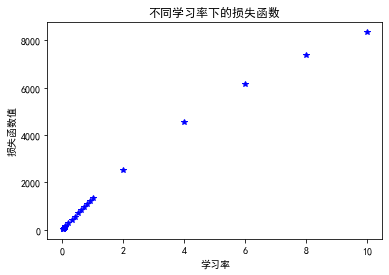

In [51]:
xdata=M[0]
ydata=M[1]
import matplotlib
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline
#通用设置
matplotlib.rc('axes', facecolor = 'white')
matplotlib.rc('figure', figsize = (6, 4))
matplotlib.rc('axes', grid = False)
#数据及线属性
plt.plot(xdata, ydata,'*b')
# 正确显示中文和负号
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
#标题设置
plt.title('不同学习率下的损失函数')
plt.xlabel('学习率')
plt.ylabel('损失函数值')

Text(0, 0.5, '损失函数值')

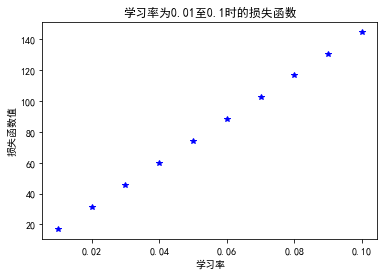

In [55]:
s=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
plt.plot(s,f,'*b')
# 正确显示中文和负号
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
#标题设置
plt.title('学习率为0.01至0.1时的损失函数')
plt.xlabel('学习率')
plt.ylabel('损失函数值')